In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline


**Step 1:** Loading relevant packages for analysis: Pandas,  sklearn, matplotlib ect..

In [2]:
df = pd.read_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/CLASS MATERIALS/14 Materials-Project3/data/diamonds-ps.csv")
df

,carat,cut,color,clarity,depth,table,x,y,z,Decision
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy
...,...,...,...,...,...,...,...,...,...,...
20995,1.02,Ideal,F,VVS2,61.9,57.0,6.53,6.42,4.01,Don�t buy
20996,1.12,Ideal,G,VVS2,61.9,57.0,6.62,6.66,4.11,Don�t buy
20997,1.13,Ideal,G,VVS1,61.2,57.0,6.72,6.65,4.09,Don�t buy
20998,1.54,Premium,J,VVS1,62.4,59.0,7.36,7.38,4.60,Don�t buy


**Question Brief:** Using Python, Conduct some exploratory data analysis, process the data if you deem it necessary, create an
appropriate model to predict whether Preriit will buy the diamond or not. 

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,Decision
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy


In [4]:
df.shape

(21000, 10)

In [5]:
df.dtypes

carat       float64
cut          object
color        object
clarity      object
depth       float64
table       float64
x           float64
y           float64
z           float64
Decision     object
dtype: object

**Step 2:** Load data and asses data types, size of dataset and if any null values present.

In [6]:
df.isnull().values.any()

False

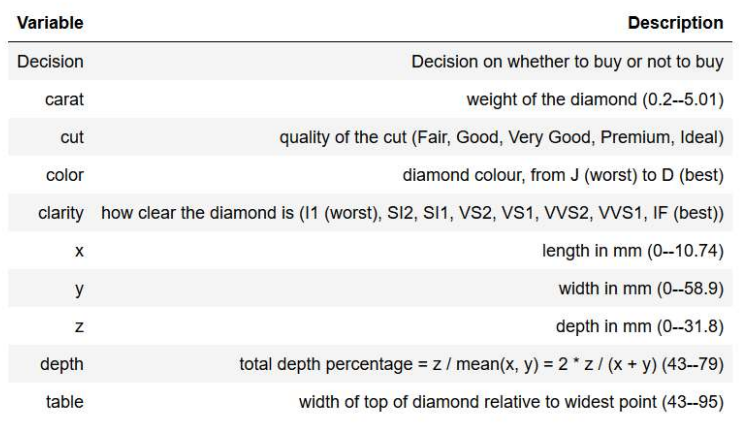

In [7]:
df['Decision'].value_counts()

Buy          12333
Don�t buy     8667
Name: Decision, dtype: int64

**Step 3:** Reviewed how many buy/don't buys there are. Review correlation matrix.

_"Preriit will buy the diamond or not."_ - so we are attempting to predict 'Decision' Yes/No based on a diamonds characteristics. 

<AxesSubplot:>

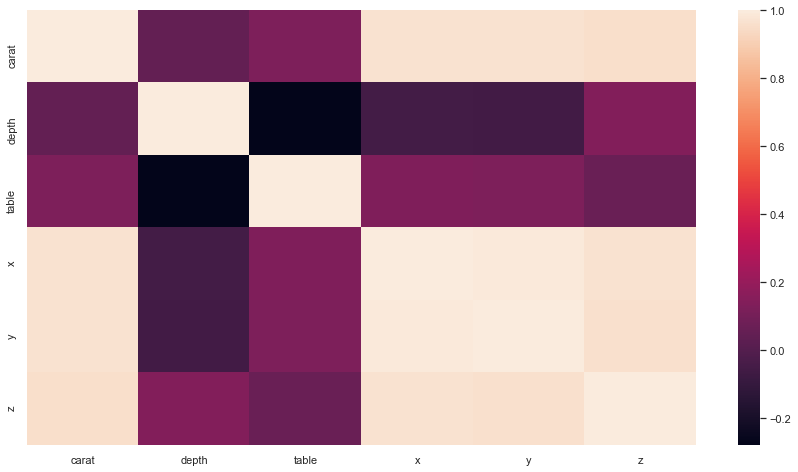

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())

**Step 4:** Quick check of 'depth' & 'table' due to high negative correlation in above matrix.

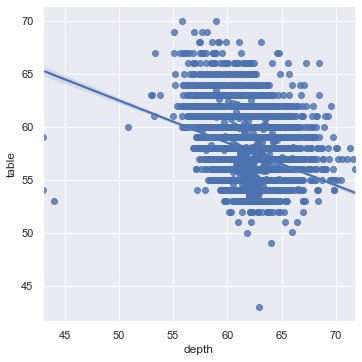

In [9]:
sns.lmplot(x="depth", y="table", data=df);

**Step 5:** create a binary aliase for buy / don't buy (Unsure if dummies would be more appropriate here, just wanted to play with generating a new alis column).

In [10]:
df["decision_alias"] = df["Decision"].map({'Buy':1, 'Don�t buy':0})
df.head(-25)

,carat,cut,color,clarity,depth,table,x,y,z,Decision,decision_alias
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy,1
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy,1
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy,1
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy,1
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy,1
...,...,...,...,...,...,...,...,...,...,...,...
20970,0.90,Very Good,D,IF,62.4,54.0,6.17,6.21,3.86,Don�t buy,0
20971,1.53,Very Good,I,SI1,63.0,58.0,7.24,7.32,4.59,Don�t buy,0
20972,1.51,Very Good,I,VS2,61.6,57.0,7.28,7.34,4.50,Don�t buy,0
20973,1.18,Premium,G,VVS2,58.2,62.0,6.92,6.89,4.02,Don�t buy,0


**Step 6:** Reviewing decision by the various categorical features (Cut, Color, Clarity)

In [11]:
cut = df[['cut','Decision']].value_counts().to_frame(name='Counts')
cut.sort_values('Decision', ascending=True)

,,Counts
cut,Decision,
Ideal,Buy,3946
Very Good,Buy,3132
Premium,Buy,3127
Good,Buy,1562
Fair,Buy,566
Ideal,Don�t buy,2889
Premium,Don�t buy,2672
Very Good,Don�t buy,2030
Good,Don�t buy,808


In [12]:
color = df[['color','Decision']].value_counts().to_frame(name='Counts')
color.sort_values('Decision', ascending=True)

,,Counts
color,Decision,
F,Buy,2266
E,Buy,2206
G,Buy,2130
H,Buy,2119
D,Buy,1588
I,Buy,1312
J,Buy,712
G,Don�t buy,2065
H,Don�t buy,1693


In [13]:
clarity = df[['clarity','Decision']].value_counts().to_frame(name='Counts')
clarity.sort_values('Decision', ascending=True)

,,Counts
clarity,Decision,
SI2,Buy,3681
SI1,Buy,3464
VS2,Buy,2104
VS1,Buy,1483
VVS2,Buy,698
VVS1,Buy,475
I1,Buy,276
IF,Buy,152
VS2,Don�t buy,2433


**Step 7:** Reviewing decision by the various continuous features (Some of the below graphs have really strange regression fits...unable to clarify why in time)

The r2 is 0.00055
The coefficent for our model is 0.0075
The intercept for our model is 0.1248


Text(0.5, 1.0, 'Cut vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


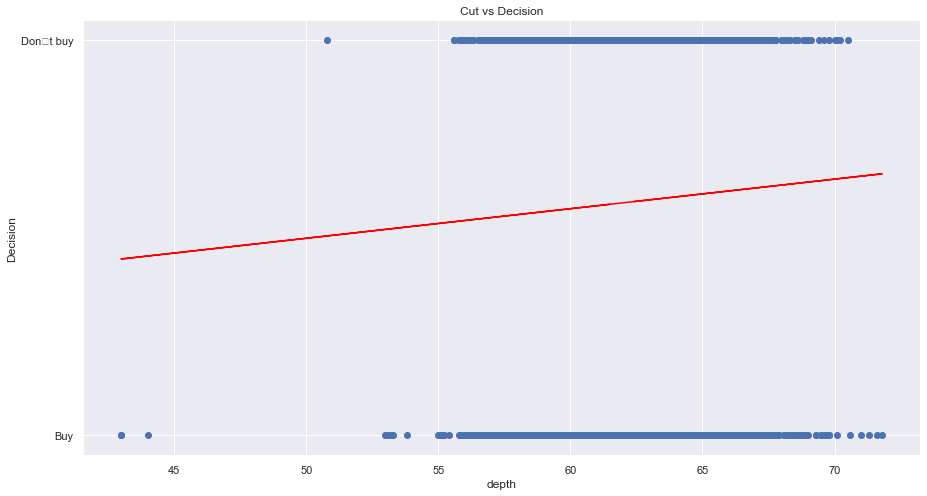

In [14]:
x = df[['depth']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.scatter(df["depth"], df["Decision"])
plt.plot(df["depth"], df["Decision_pred"], color='red')
plt.xlabel("depth")
plt.ylabel("Decision")
plt.title("Cut vs Decision")

The r2 is 9.2e-06
The coefficent for our model is 0.00067
The intercept for our model is 0.5485


Text(0.5, 1.0, 'Table vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


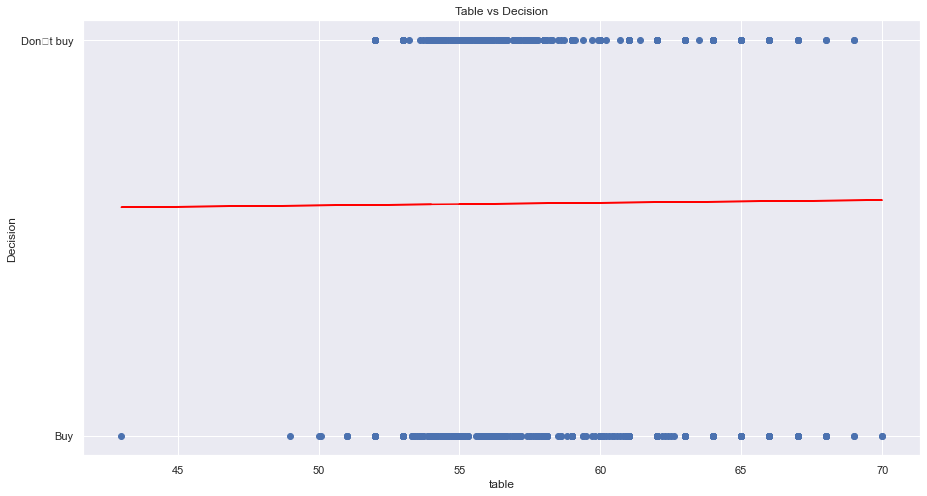

In [15]:
x = df[['table']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.scatter(df["table"], df["Decision"])
plt.plot(df["table"], df["Decision_pred"], color='red')
plt.xlabel("table")
plt.ylabel("Decision")
plt.title("Table vs Decision")

The r2 is 0.3
The coefficent for our model is -0.35
The intercept for our model is 2.758


Text(0.5, 1.0, 'X vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


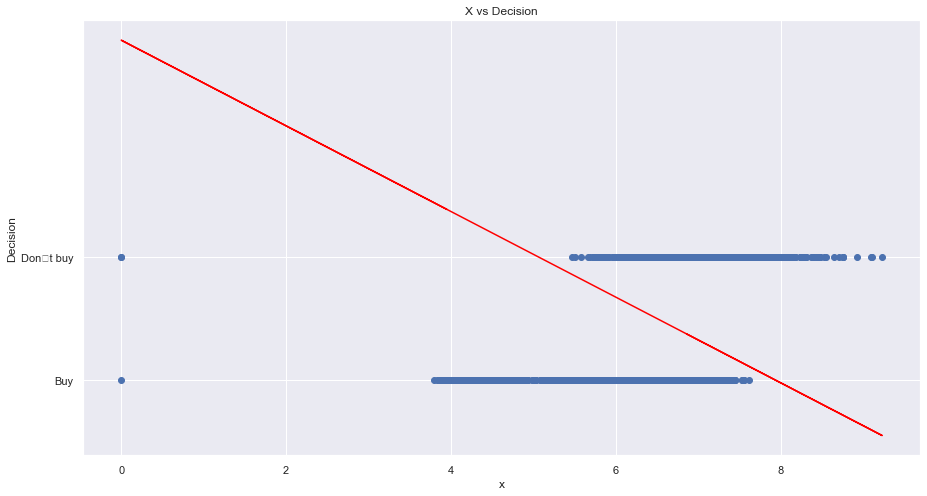

In [16]:
x = df[['x']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.plot(df["x"], df["Decision_pred"], color='red')
plt.scatter(df["x"], df["Decision"])
plt.xlabel("x")
plt.ylabel("Decision")
plt.title("X vs Decision")



The r2 is 0.31
The coefficent for our model is -0.35
The intercept for our model is 2.804


Text(0.5, 1.0, 'Y vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


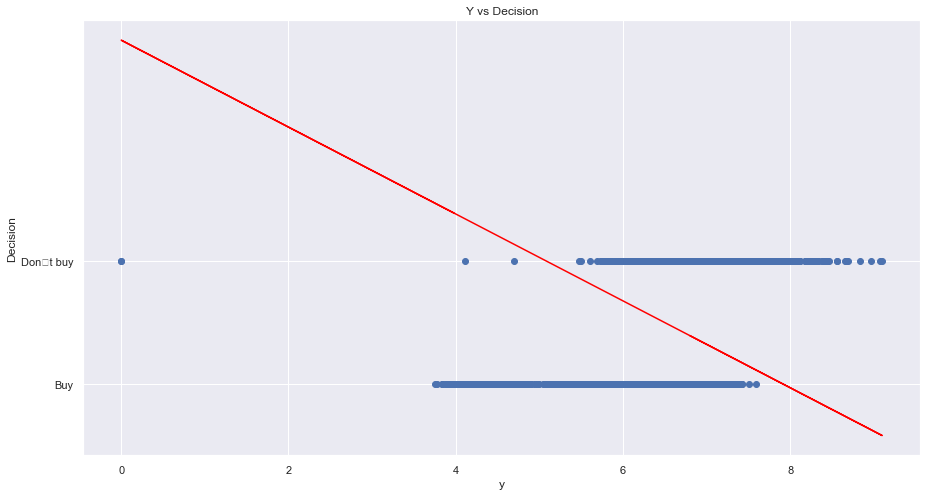

In [17]:
x = df[['y']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.plot(df["y"], df["Decision_pred"], color='red')
plt.scatter(df["y"], df["Decision"])
plt.xlabel("y")
plt.ylabel("Decision")
plt.title("Y vs Decision")



The r2 is 0.29
The coefficent for our model is -0.54
The intercept for our model is 2.681


Text(0.5, 1.0, 'Z vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


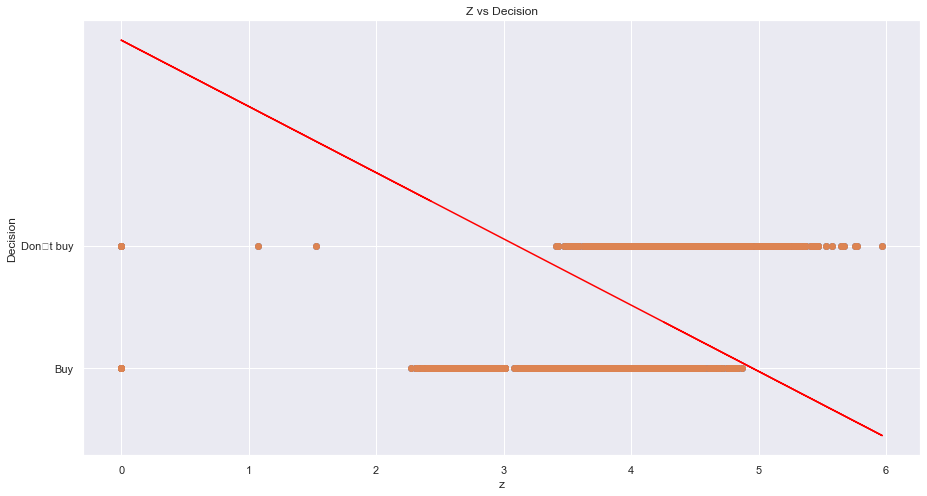

In [18]:
plt.scatter(df["z"], df["Decision"])
plt.xlabel("table")
plt.ylabel("Decision")
plt.title("Z vs Decision")


x = df[['z']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.plot(df["z"], df["Decision_pred"], color='red')
plt.scatter(df["z"], df["Decision"])
plt.xlabel("z")
plt.ylabel("Decision")
plt.title("Z vs Decision")


The r2 is 0.35
The coefficent for our model is -0.94
The intercept for our model is 1.497


Text(0.5, 1.0, 'Carat vs Decision')

C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


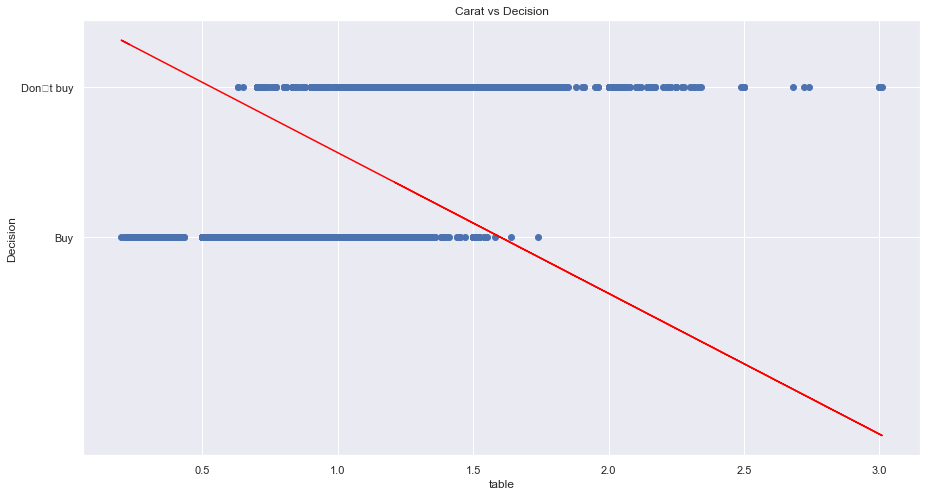

In [19]:
x = df[['carat']]
y = df[['decision_alias']]

regression_model = LinearRegression()
regression_model.fit(x, y)
lr2 = regression_model.fit(x, y)
r2 = regression_model.score(x,y)
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The r2 is {:.2}".format(r2))
print("The coefficent for our model is {:.2}".format(coefficent))
print("The intercept for our model is {:.4}".format(intercept))

Y_pred = regression_model.predict(x)
df["Y_pred"] = Y_pred

df["Decision_pred"] = lr2.predict(x)

plt.plot(df["carat"], df["Decision_pred"], color='red')
plt.scatter(df["carat"], df["Decision"])
plt.xlabel("table")
plt.ylabel("Decision")
plt.title("Carat vs Decision")

**Step 8:** Generate dummies for categorical features. 

In [20]:
dummies = pd.get_dummies(df[['cut', 'color','clarity']])
dummies

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
20996,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
20997,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
20998,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


**Step 9:** Generate final dataframe to be fitter to model.

In [21]:
X = pd.concat([df,dummies],axis='columns')
X

,carat,cut,color,clarity,depth,table,x,y,z,Decision,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.02,Ideal,F,VVS2,61.9,57.0,6.53,6.42,4.01,Don�t buy,...,0,0,0,0,0,0,0,0,0,1
20996,1.12,Ideal,G,VVS2,61.9,57.0,6.62,6.66,4.11,Don�t buy,...,0,0,0,0,0,0,0,0,0,1
20997,1.13,Ideal,G,VVS1,61.2,57.0,6.72,6.65,4.09,Don�t buy,...,0,0,0,0,0,0,0,0,1,0
20998,1.54,Premium,J,VVS1,62.4,59.0,7.36,7.38,4.60,Don�t buy,...,0,1,0,0,0,0,0,0,1,0


In [22]:
X = X.drop(['cut','color','clarity','Decision','decision_alias','Y_pred','Decision_pred'],axis='columns')
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.02,61.9,57.0,6.53,6.42,4.01,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
20996,1.12,61.9,57.0,6.62,6.66,4.11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
20997,1.13,61.2,57.0,6.72,6.65,4.09,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
20998,1.54,62.4,59.0,7.36,7.38,4.60,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


**Step 10:** Check shape and datatypes before adding to model.

In [23]:
X.shape

(21000, 26)

In [24]:
X.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [25]:
y = df[["decision_alias"]]
y

,decision_alias
0,1
1,1
2,1
3,1
4,1
...,...
20995,0
20996,0
20997,0
20998,0


**Step 11:** Review correlation matrix of the full dataframe against 'decision_alias' (our binary 1/0 result) Any high-correlation features which may influence a decision either way.

<AxesSubplot:>

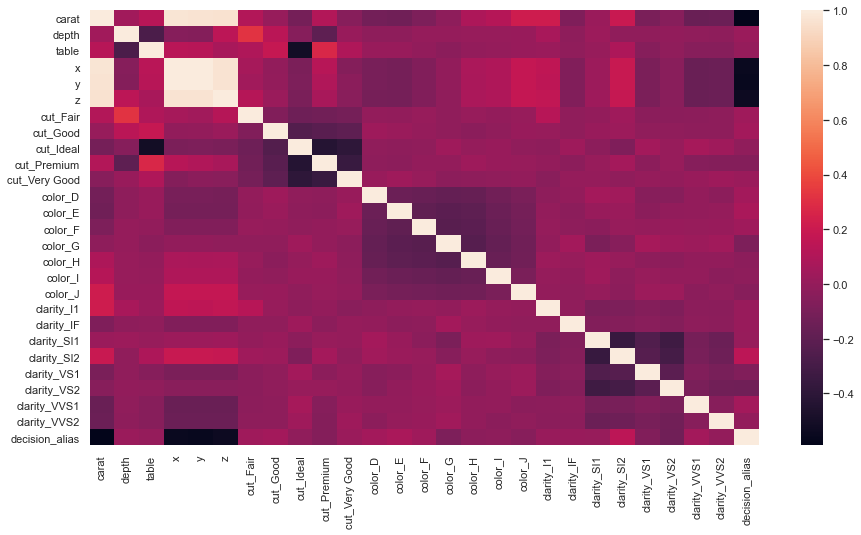

In [26]:
test = pd.concat([X,y],axis='columns')

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test.corr())

**Step 12:** Train test split and fit model.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [28]:
len(X_train)

16800

In [29]:
X_train.shape

(16800, 26)

In [30]:
len(X_test)

4200

In [31]:
X_test.shape

(4200, 26)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

C:\Users\j.alexander1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\j.alexander1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

**Step 13:** Review model score: 0.91 seems pretty good!

In [35]:
model.score(X_test,y_test)

0.9176190476190477

**Step 14:** Explore probability a diamond may be bought or not:

In [36]:
model.predict_proba(X_test)

array([[0.21458486, 0.78541514],
       [0.98440852, 0.01559148],
       [0.0038489 , 0.9961511 ],
       ...,
       [0.89416766, 0.10583234],
       [0.0592276 , 0.9407724 ],
       [0.99842181, 0.00157819]])

In [37]:
np.exp(model.coef_)

array([[1.15180157e-03, 1.74533509e+00, 1.30601250e+00, 2.35818137e-01,
        1.81042258e-01, 2.16950903e-03, 1.72990095e+00, 1.26874181e+00,
        1.12779176e+00, 1.53298368e+00, 1.21270142e+00, 1.38854731e-01,
        1.88679501e-01, 2.79063521e-01, 6.03490284e-01, 2.11805696e+00,
        4.86901660e+00, 1.01129342e+02, 6.76123992e+03, 1.41993214e-01,
        2.21283347e+00, 3.80037212e+01, 1.47992541e-01, 3.05355477e-01,
        4.36938312e-02, 2.88655853e-02]])

In [38]:
print(model.intercept_)
print(model.coef_)

[1.55910817]
[[-6.76642798  0.55694657  0.2669786  -1.44469438 -1.70902481 -6.13325439
   0.54806415  0.23802571  0.12026152  0.42721596  0.19285045 -1.97432699
  -1.66770547 -1.27631585 -0.50502534  0.75049914  1.58289199  4.61640031
   8.81896157 -1.95197601  0.79427381  3.63768408 -1.91059341 -1.18627868
  -3.13054835 -3.54510521]]


**Step 15:** Visualise/print confusion matrix

In [39]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[1575,  185],
       [ 161, 2279]], dtype=int64)

In [40]:
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.91      0.89      0.90      1760\n           1       0.92      0.93      0.93      2440\n\n    accuracy                           0.92      4200\n   macro avg       0.92      0.91      0.92      4200\nweighted avg       0.92      0.92      0.92      4200\n'

[[1575  185]
 [ 161 2279]]


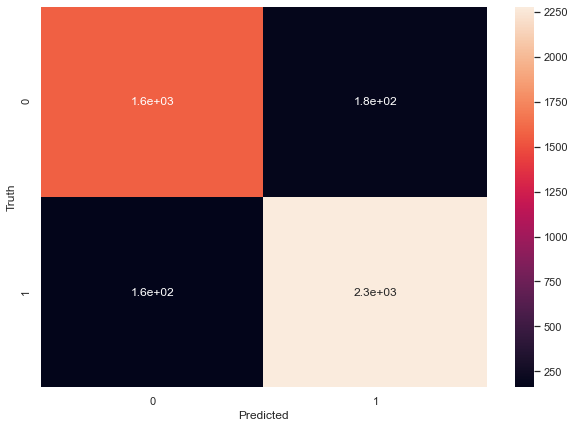

In [41]:
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(confusion_matrix(y_test, y_predicted))

**Potential Bias**
One additional point to note here is 'Price' is missing as a key feature for purchasing decisions. The model indicates lower carat / smaller [referring to X,Y,Z] diamonds have a higher change of being 'Bought'. One hypothesis is smaller, lower carat diamonds are likely lower priced, meaning they generate greater sales in a mass-market. 

As such, the dataset is biased, by indicating lower quality products are a more successful strategy. 